## Context

The df_cleanedset provided represents _customer transaction df_cleaned_ for an e-commerce platform. Each row contains details about an individual customer’s purchasing behavior and demographics, while each column represents a different feature of that behavior or characteristic. 

Columns are:

- CustomerID
- Gender
- Age
- Annual Income (k$)
- Spending Score (1-100)


The goal is to segment the customers into distinct groups based on their df_cleaned. These segments can help the e-commerce platform better understand their customers, enabling targeted marketing strategies, personalized recommendations, and improved customer satisfaction.

**Assignment: Clustering Analysis with K-Means, Agglomerative Clustering, and DBSCAN**

In [419]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import os
import warnings

warnings.filterwarnings('ignore')


In [420]:
df = pd.read_csv('./customers.csv')
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19.0,15.0,39.0
1,2,Male,21.0,15.0,81.0
2,3,Female,20.0,16.0,6.0
3,4,Female,23.0,16.0,77.0
4,5,Female,31.0,17.0,40.0


Step 1: Data Preprocessing

Data Cleaning: Handle missing values appropriately (imputation or removal). Identify and address outliers if they may distort clustering.

Normalization: Normalize the numerical features using appropriate scaling methods (e.g., Min-Max Scaling, Standard Scaling) to ensure all features are on a comparable scale.

Feature Selection: Choose the most relevant features for clustering based on domain knowledge or exploratory data analysis.


In [421]:
df.describe(include='all')

,CustomerID,Gender,Age,Annual_Income,Spending_Score
count,219.000000,217,216.000000,218.000000,218.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,119,NaN,NaN,NaN
mean,110.000000,NaN,38.157407,62.628440,50.252294
std,63.364028,NaN,13.797312,27.804527,25.752735
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,55.500000,NaN,28.000000,42.000000,34.250000
50%,110.000000,NaN,35.000000,62.000000,50.000000
75%,164.500000,NaN,48.000000,78.000000,72.750000


In [422]:
# Dataset dimensions - (rows, columns)
df.shape

(219, 5)

In [423]:
# Determining Data type of all coulmns
df.dtypes

CustomerID          int64
Gender             object
Age               float64
Annual_Income     float64
Spending_Score    float64
dtype: object

In [424]:
#Getting the statistical analysis of the Data
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,219.000000,216.000000,218.000000,218.000000
mean,110.000000,38.157407,62.628440,50.252294
std,63.364028,13.797312,27.804527,25.752735
min,1.000000,18.000000,15.000000,1.000000
25%,55.500000,28.000000,42.000000,34.250000
50%,110.000000,35.000000,62.000000,50.000000
75%,164.500000,48.000000,78.000000,72.750000
max,219.000000,70.000000,141.000000,99.000000


In [425]:
# Determining the (null) in the data
df.isnull().sum()


CustomerID        0
Gender            2
Age               3
Annual_Income     1
Spending_Score    1
dtype: int64

It appears that we have 2 Null in the Gender , 3 in Age , 1 in Annual_Income and 1 in spending_score


In [426]:
#so we will fill in the missing data in Gender with the highest Frequency by determining the number of female and male in the data #
num_male = df[df['Gender'] == 'Male'].shape[0]
num_female = df[df['Gender'] == 'Female'].shape[0]
print(f'Number of males in the data is {num_male}')
print(f'Number of females in the data is {num_female}')


Number of males in the data is 98
Number of females in the data is 119


So it appears that the Number of Female exceeds Number of male so we will replace the missing value with the Mode of the data 

In [427]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [428]:
# since Gender column is object we will encode it so it will be a numerical values 
df['Gender_Encoded'] = df['Gender'].map({'Male': 0, 'Female': 1})



In [429]:
# and also we fill the missin value (nan ) with the rest of the three  columns 
# first the missing value of age will be replaced by the Median and for the Annual_Income and the Spending_Score by the mean
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Annual_Income'].fillna(df['Annual_Income'].mean(),inplace=True)
df['Spending_Score'].fillna(df['Spending_Score'].mean(),inplace=True)

In [430]:
# verifying the result that there is no nan values

df.isnull().sum()


CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
Gender_Encoded    0
dtype: int64

Identify and address outliers if they may distort clustering:
To identify the outlier we will plot the relationship of Age and Annual_Income


In [431]:
# we need to drop Customer Id as it is not much informative
df.drop(columns=['CustomerID'], inplace=True)

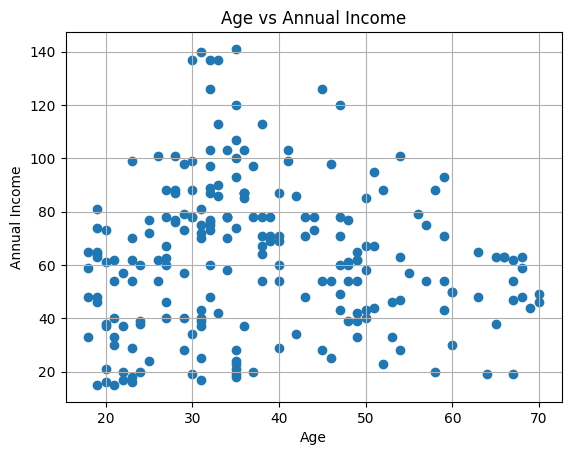

In [432]:
plt.scatter(df['Age'], df['Annual_Income'])
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.grid(True) 
plt.show()

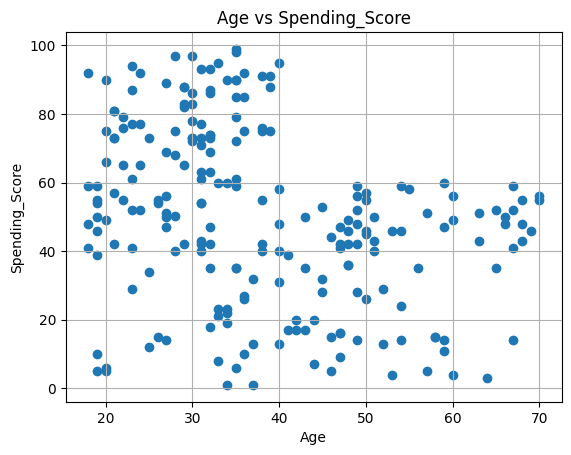

In [433]:
plt.scatter(df['Age'], df['Spending_Score'])
plt.title('Age vs Spending_Score')
plt.xlabel('Age')
plt.ylabel('Spending_Score')
plt.grid(True) 
plt.show()

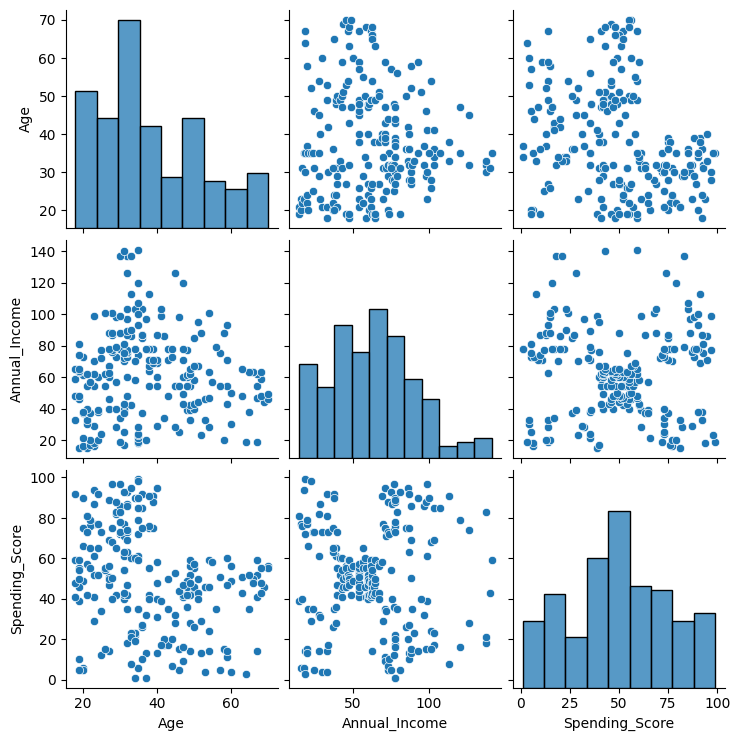

In [434]:

sns.pairplot(df[['Age', 'Annual_Income', 'Spending_Score']])
plt.show()

Handling outlier using Standardization of data  (StandardScaler )

In [435]:
# scaling the numerical columns
numerical_cols = ['Age', 'Annual_Income', 'Spending_Score', 'Gender_Encoded']
df_numerical = df[numerical_cols]

In [436]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numerical)

In [437]:
# coverting the to a DataFrame for better readability
scaled_data_df = pd.DataFrame(scaled_data, columns=df_numerical.columns)
scaled_data_df.head()

,Age,Annual_Income,Spending_Score,Gender_Encoded
0,-1.397678,-1.720850,-0.438945,-1.111168
1,-1.251432,-1.720850,1.199448,-1.111168
2,-1.324555,-1.684719,-1.726254,0.899954
3,-1.105187,-1.684719,1.043411,0.899954
4,-0.520206,-1.648589,-0.399935,0.899954


In [438]:
# Convert the scaled data into a DataFrame for better readability
scaled_data_df = pd.DataFrame(scaled_data, columns=df_numerical.columns)
scaled_data_df.head()

,Age,Annual_Income,Spending_Score,Gender_Encoded
0,-1.397678,-1.720850,-0.438945,-1.111168
1,-1.251432,-1.720850,1.199448,-1.111168
2,-1.324555,-1.684719,-1.726254,0.899954
3,-1.105187,-1.684719,1.043411,0.899954
4,-0.520206,-1.648589,-0.399935,0.899954


Choose the most relevant features for clustering based on domain knowledge or exploratory data analysis
we will conduct a correlation matrix to see which feature are closely related to each other

In [439]:
# examining the correlation
corr_mat = scaled_data_df.corr()
for x in range(corr_mat.shape[0]):
  corr_mat.iloc[x,x] = 0.0
corr_mat

,Age,Annual_Income,Spending_Score,Gender_Encoded
Age,0.000000,-0.029347,-0.315957,-0.054937
Annual_Income,-0.029347,0.000000,-0.016558,-0.076990
Spending_Score,-0.315957,-0.016558,0.000000,0.043873
Gender_Encoded,-0.054937,-0.076990,0.043873,0.000000


we will use PCA to reduce Dimentions from 4D(Feautures : Age	Annual_Income	Spending_Score , Gender)to 3D


In [440]:
# Measuring the difference in variance and how much data is represented when reducing a Dimention
pca_list = []
for n in range(1, scaled_data_df.shape[1] + 1):
    pca_module = PCA(n_components=n)
    pca_module.fit(scaled_data_df)
    pca_list.append({'n_components': n, 'explained_variance_ratio': pca_module.explained_variance_ratio_.sum()})

pca_results_df = pd.DataFrame(pca_list)
print(pca_results_df)

   n_components  explained_variance_ratio
0             1                  0.332720
1             2                  0.600469
2             3                  0.830024
3             4                  1.000000


In [601]:
# Fit PCA with all components
pca = PCA(n_components=4)
pca.fit(scaled_data_df)

# Check the variance and how much it affect the total data
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = pca.explained_variance_ratio_.cumsum()
for i, (ev, cv) in enumerate(zip(explained_variance_ratio, cumulative_variance), 1):
    print(f"Component {i}: Explained Variance = {ev:.2f}, Cumulative Variance = {cv:.2f}")


Component 1: Explained Variance = 0.33, Cumulative Variance = 0.33
Component 2: Explained Variance = 0.27, Cumulative Variance = 0.60
Component 3: Explained Variance = 0.23, Cumulative Variance = 0.83
Component 4: Explained Variance = 0.17, Cumulative Variance = 1.00


so we will choose PCA = 3 so about 83% of our Data will be presented

In [602]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)  
reduced_data = pca.fit_transform(scaled_data_df)

In [603]:
reduced_data_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2', 'PC3'])
pca_components = pca.components_
pca_components_df = pd.DataFrame(pca_components,columns=scaled_data_df.columns, index=['PC1', 'PC2', 'PC3']  )
print(pca_components_df)

          Age  Annual_Income  Spending_Score  Gender_Encoded
PC1  0.691933       0.022384       -0.689902       -0.211572
PC2 -0.145992       0.744363        0.076191       -0.647152
PC3  0.019595       0.657660       -0.183026        0.730480


In [604]:
# Using Elbow method to determine optimal number of clusters
from sklearn.cluster import KMeans
inertia = []
no_clusters = range(1, 11)

for k in no_clusters:
    kmeans = KMeans(n_clusters=k, random_state=10)  
    kmeans.fit(reduced_data_df) 
    inertia.append(kmeans.inertia_)

  

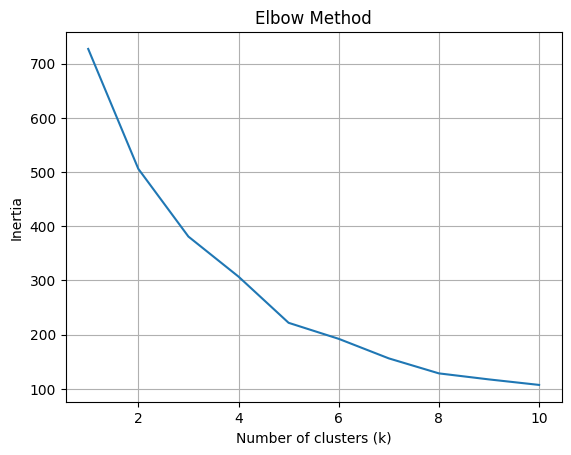

In [605]:
# visualizing the elbow method
plt.plot(no_clusters, inertia)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid('True')
plt.show()

In [606]:
# Applying KMeans at k = 4
kmeans = KMeans(n_clusters=4, max_iter=200, n_init=10, random_state=10)

kmeans.fit(reduced_data)
kmeans_cluster = kmeans.predict(reduced_data)
df['Cluster'] = kmeans_cluster  



In [462]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(reduced_data, kmeans.labels_)
print(f"Silhouette Score for k=4: {silhouette_avg:.2f}")


Silhouette Score for k=4: 0.39


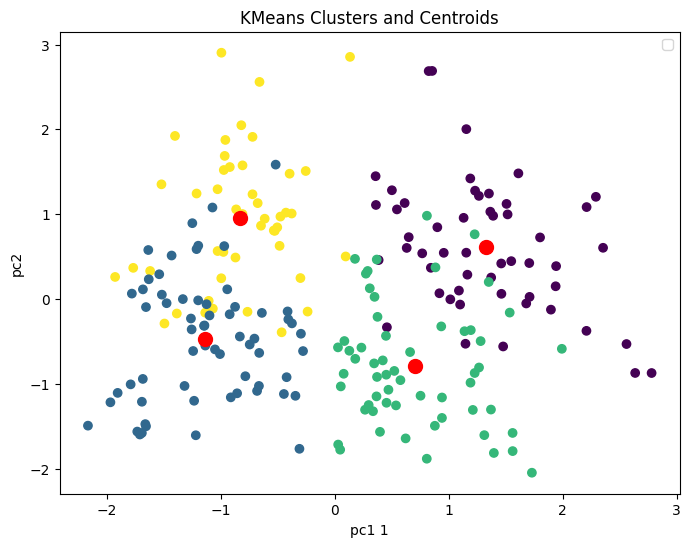

In [608]:
# Plotting the clusters and centroids
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.title('KMeans Clusters and Centroids')
plt.xlabel('pc1 1')
plt.ylabel('pc2')
plt.legend()
plt.show()

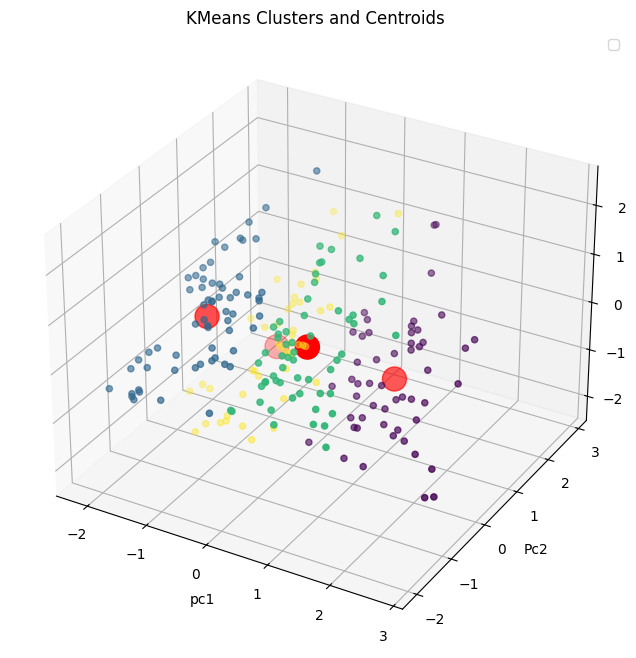

In [609]:

# Plotting the clusters and centroids in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=df['Cluster'], cmap='viridis')

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red')
ax.set_title('KMeans Clusters and Centroids ')
ax.set_xlabel('pc1')
ax.set_ylabel('Pc2')
ax.set_zlabel('Pc3')
plt.legend()

plt.show()


For linkage = single, the silhouette score is 0.2676360641738842


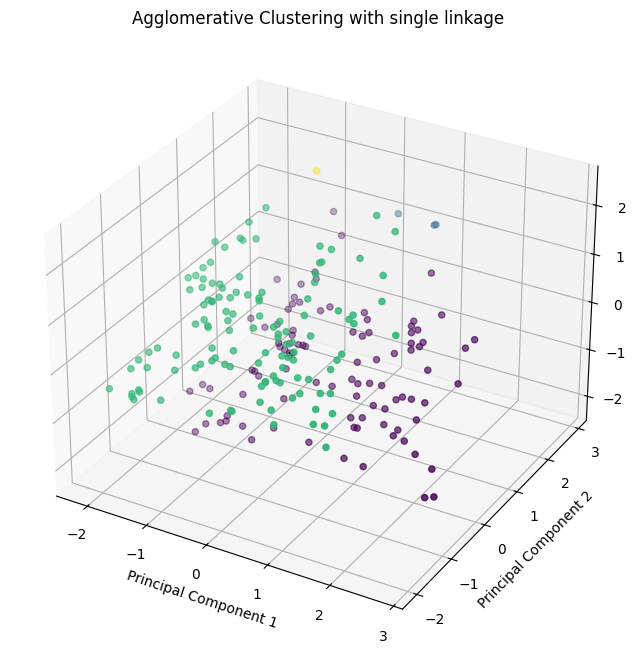

For linkage = complete, the silhouette score is 0.22355469255098426


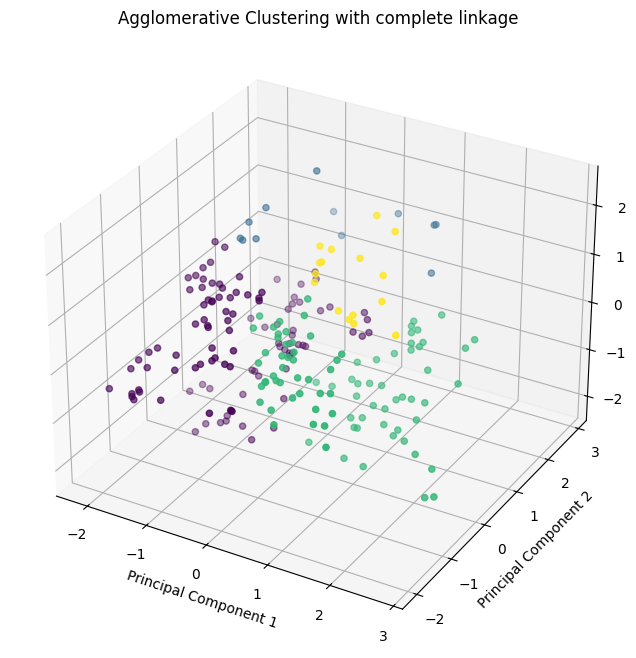

For linkage = average, the silhouette score is 0.3412237275861409


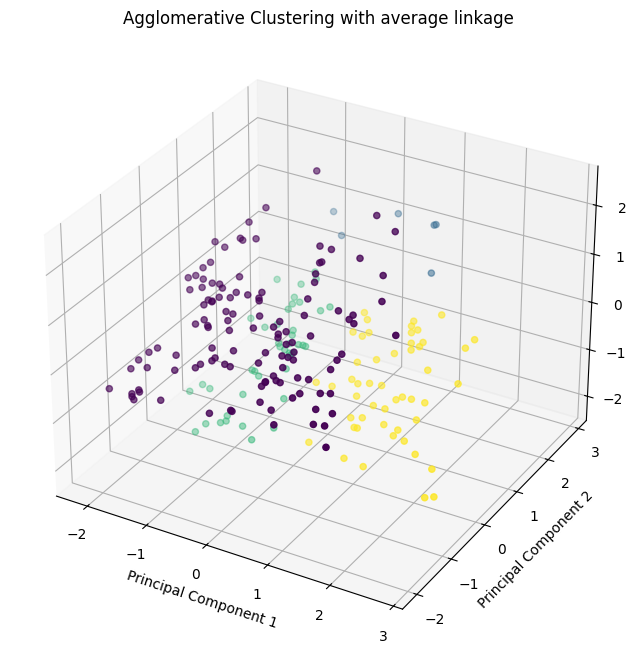

For linkage = ward, the silhouette score is 0.3394154412116026


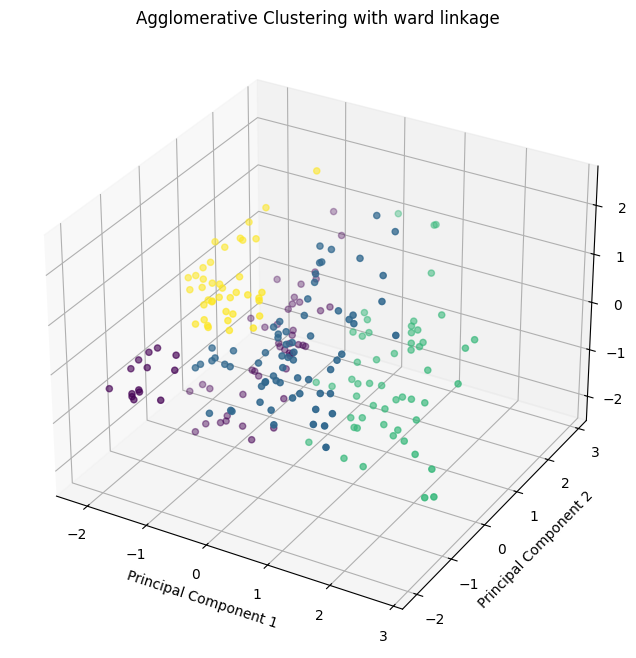

From the silhouette score, the best linkage method is: ward
Data Points in Each Cluster:
Cluster
0    121
1      6
2     42
3     50
dtype: int64


In [610]:
# Agllomerative clustering for the reduced_data(pca)
from sklearn.cluster import AgglomerativeClustering

for linkage in linkages:
    # Apply Agglomerative Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage=linkage)
    clusters = agg_clustering.fit_predict(reduced_data) 
    clusters_list.append(clusters)
    
    # Calculating the silhouette score
    silhouette_avg = silhouette_score(reduced_data, clusters)
    silhouette_avg_list.append(silhouette_avg)
    print(f'For linkage = {linkage}, the silhouette score is {silhouette_avg}')

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=clusters, cmap='viridis')
    ax.set_title(f'Agglomerative Clustering with {linkage} linkage')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    plt.show()

best_linkage = linkages[silhouette_avg_list.index(max(silhouette_avg_list))]
print(f"From the silhouette score, the best linkage method is: {best_linkage}")

df['Cluster'] = clusters_list[silhouette_avg_list.index(max(silhouette_avg_list))]
agg_labels = df['Cluster']
print("Data Points in Each Cluster:")
print(df.groupby('Cluster').size())
   

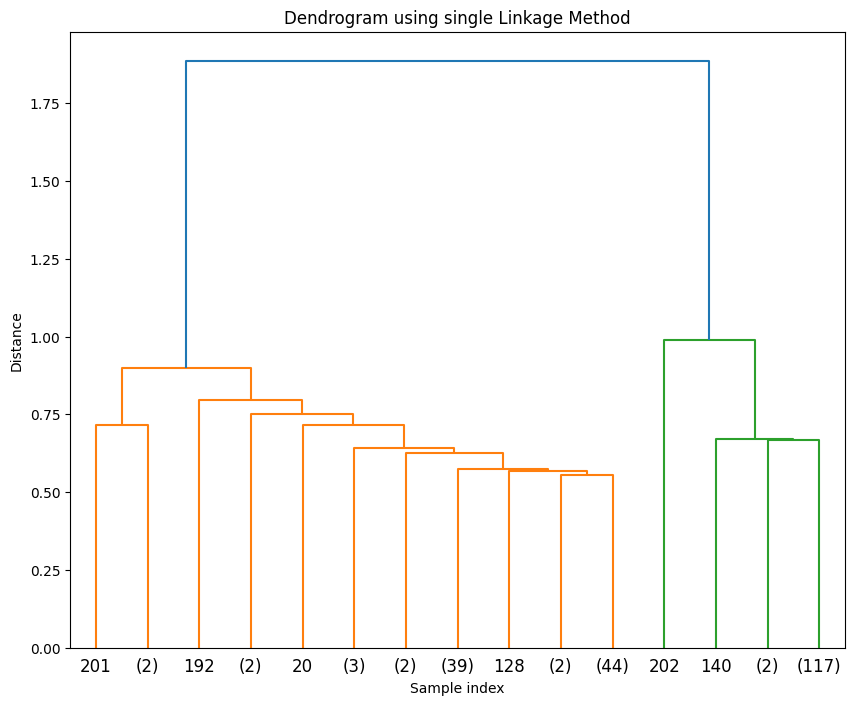

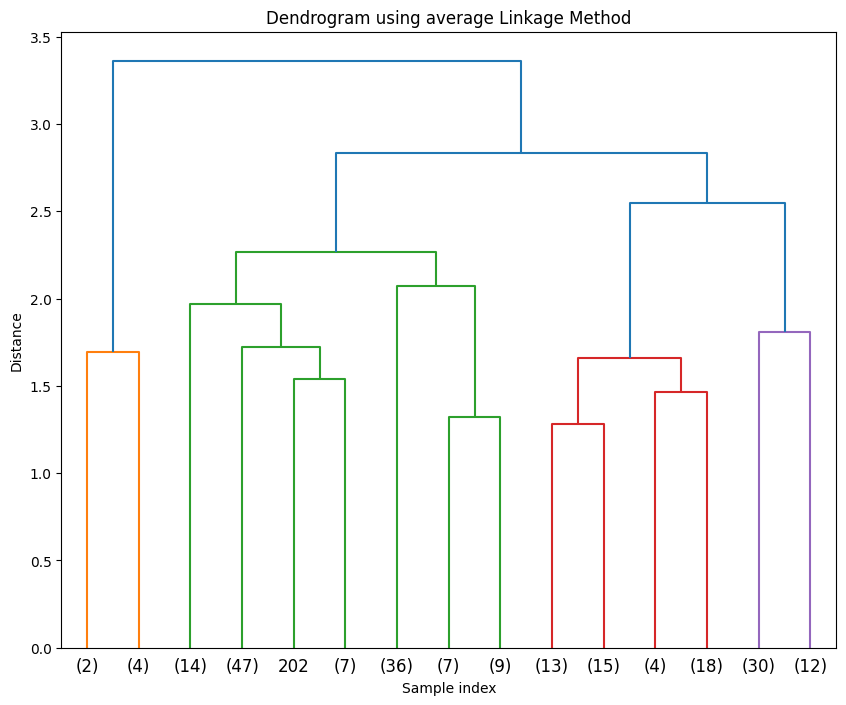

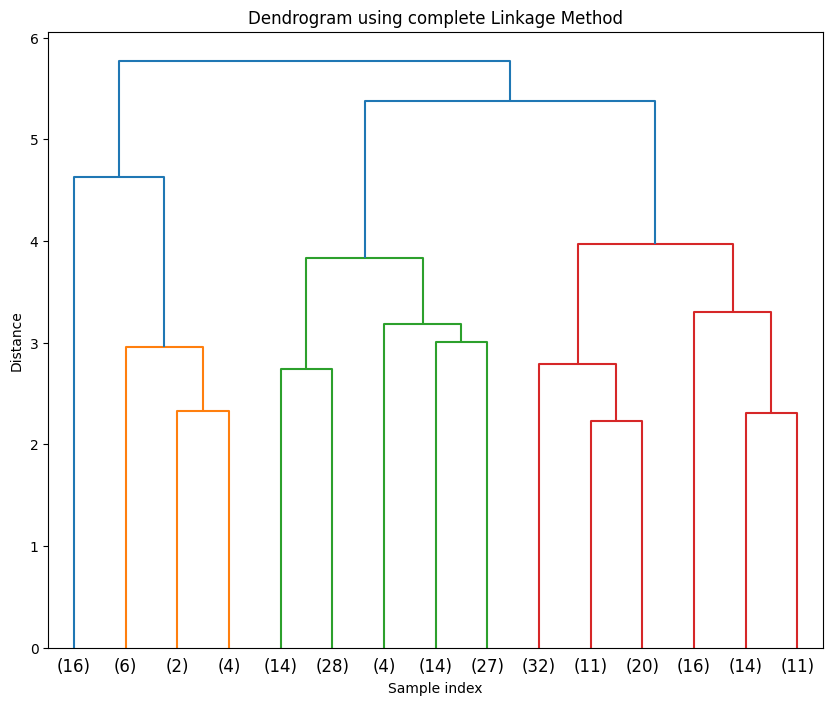

In [611]:
# Applying Agglomerative Clustering with different linkage methods (using dendogram)
from scipy.cluster.hierarchy import linkage, dendrogram
X = reduced_data
linkage_methods = ['single', 'average', 'complete']
for method in linkage_methods:
    plt.figure(figsize=(10, 8)) 
    Z = linkage(X, method=method)
    
    # plotting the dendrogram
    dendrogram(Z, truncate_mode="lastp", p=15)
    plt.title(f'Dendrogram using {method} Linkage Method')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()


DBSCAN:
Tune the parameters eps (epsilon) and min_samples using a grid search or empirical analysis.
Visualize clusters and identify noise points (outliers).

In [612]:
# finding the best epsilon and number for sample
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, silhouette_score

# Define the parameter grid
param_grid = {
    'eps': [0.3, 0.5, 0.7, 0.9, 1.3, 1.5, 1.7, 1.9, 2.1],
    'min_samples': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
}

# Define the scoring function
scorer = make_scorer(silhouette_score)

grid_search = GridSearchCV(DBSCAN(), param_grid, scoring=silhouette_scorer, cv=3)
grid_search.fit(reduced_data)

print("Best Parameter:", grid_search.best_params_)
print("Best Silhouette Score:", grid_search.best_score_)


Best Parameter: {'eps': 0.9, 'min_samples': 10}
Best Silhouette Score: 0.43700649339565983


The best number of samples is 6 with an epsilon = 0.2 and the highest silhouette score = 0.8967430234171078

In [613]:
# Applying the results for DBSCAN with optimal epsilon and min_samples
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.9, min_samples=10,metric='euclidean')  
db.fit(reduced_data)


DBSCAN(eps=0.9, min_samples=10)

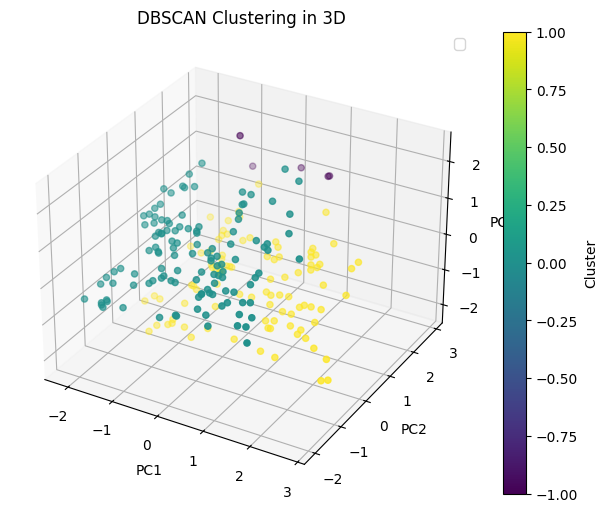

In [615]:
# Visualizing the result and identifying outliers
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=db.labels_, cmap='viridis')
ax.set_title('DBSCAN Clustering in 3D')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.show()


In [616]:
# also we can sum up the no of outliers
outliers = np.sum(db.labels_ == -1)
print(f"Number of outliers: {outliers}")

Number of outliers: 5


## Step 3: Analysis of Results

Compare the clusters obtained from the three methods in terms of:
Cluster composition and size.
Overlap and differences between clustering results.
Silhouette Scores and other evaluation metrics.

In [587]:

# Counting the number of samples in each cluster
kmeans_counts = pd.Series(kmeans.labels_).value_counts().sort_index()  
agg_counts = pd.Series(agg.labels_).value_counts().sort_index()  
dbscan_counts = pd.Series(db.labels_).value_counts().sort_index()

cluster_size = pd.DataFrame({'KMeans': kmeans_counts,'Agglomerative': agg_counts,'DBSCAN': dbscan_counts}).fillna(0) 
print(cluster_size)




    KMeans  Agglomerative  DBSCAN
-1     0.0            0.0     5.0
 0    52.0           94.0   120.0
 1    63.0            3.0    94.0
 2    58.0          120.0     0.0
 3    46.0            1.0     0.0
 4     0.0            1.0     0.0


In [589]:
# printing out the results from different clustering methods
from sklearn.metrics import adjusted_rand_score

agg_labels = agg.labels_ 

kmeansVSagglo = adjusted_rand_score(clustred_data, agg_labels) 
kmeansVSdbscan = adjusted_rand_score(clustred_data, db.labels_) 
aggloVSdbscan = adjusted_rand_score(agg_labels, db.labels_)  
print(f"KMeans vs Agglomerative: {kmeansVSagglo}")
print(f"KMeans vs DBSCAN: {kmeansVSdbscan}")
print(f"Agglomerative vs DBSCAN: {aggloVSdbscan}")


KMeans vs Agglomerative: 0.4241966855913332
KMeans vs DBSCAN: 0.42499471093194713
Agglomerative vs DBSCAN: 0.9838098956379404


In [617]:
# Compute silhouette scores for each clustering method 
from sklearn.metrics import silhouette_score

# For KMeans
kmeans_silhouette = silhouette_score(reduced_data, clustred_data)

# For Agglomerative Clustering
agglo_silhouette = silhouette_score(reduced_data, agg.labels_)

# For DBSCAN (excluding noise points, i.e., dbscan_labels != -1)
dbscan_silhouette = silhouette_score(reduced_data[db.labels_ != -1], db.labels_[db.labels_ != -1])
print(f"KMeans Silhouette Score: {kmeans_silhouette}")
print(f"Agglomerative Silhouette Score: {agglo_silhouette}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")


KMeans Silhouette Score: 0.40761005098811437
Agglomerative Silhouette Score: 0.2119106715858398
DBSCAN Silhouette Score: 0.34706987242641196


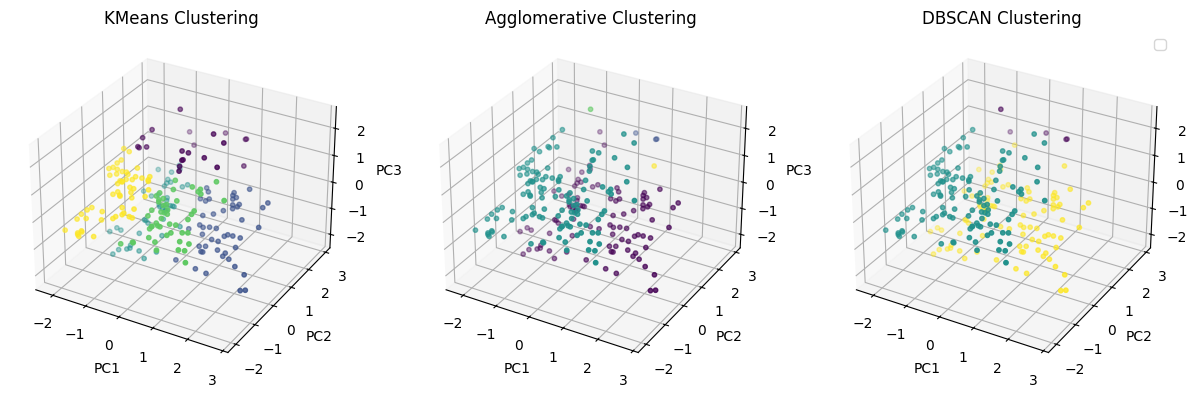

In [618]:
# Representing the different between clustering method visually in 3D
clustering_labels = [clustred_data, agg.labels_, db.labels_]
titles = ['KMeans Clustering', 'Agglomerative Clustering', 'DBSCAN Clustering']
fig = plt.figure(figsize=(15, 5))
for i, labels in enumerate(clustering_labels):
    ax = fig.add_subplot(1, 3, i + 1, projection='3d')
    ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=labels, cmap='viridis', s=10)
    ax.set_title(titles[i])
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
plt.legend()
plt.show()




In [619]:
# Counting the number of clusters and data points inside
unique_labels = np.unique(db.labels_)
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
print(f"Number of clusters formed: {num_clusters}")
print(f"Labels: {unique_labels}")
cluster_counts = pd.Series(db.labels_).value_counts().sort_index()
print(cluster_counts)

Number of clusters formed: 2
Labels: [-1  0  1]
-1      5
 0    120
 1     94
Name: count, dtype: int64


## Step 4: Summarize as Report

## Clustering Results

We tried 3 different clustering methods on our data:

- **KMeans**: This method created 4 clusters. The points in these clusters were fairly evenly distributed, with the sizes being 52, 63, 58, and 46.
  
- **Agglomerative Clustering**: This method also made 4 clusters, but most of the data points ended up in one large cluster (121 points). The other clusters had only 6, 42, and 50 points, with the cluster of 6 points possibly containing outliers.
  
- **DBSCAN**: This method found 2 main clusters with 120 and 94 points, along with 5 points identified as outliers.

---

## Silhouette Scores

The **Silhouette Score** :

- **KMeans**: **0.41** – The highest score, indicating well-separated clusters.
- **Agglomerative Clustering**: **0.21** – A low score, suggesting that the clusters are not well represented.
- **DBSCAN**: **0.35** – A moderate score, showing an average  but less than KMeans.

---

## Relationship Between Clustering Methods

Looking at the similarity between the methods using the Adjusted Rand Index:

- **KMeans vs Agglomerative**: These two methods show a fairly weak correlation of **0.42**. 
- **KMeans vs DBSCAN**: Similarly, a weak correlation (**0.42**) between the two methods.
- **Agglomerative vs DBSCAN**: A strong correlation of **0.98**, suggesting that these two methods are much more aligned.

---

## Data Visualization

From the visualizations, we can make the following observations:

- **KMeans**: The data was fairly divided into 4 clusters, with nearly equal sizes.
  
- **Agglomerative Clustering**: This method also created 4 clusters, but the majority of data points were concentrated in the first cluster.
  
- **DBSCAN**: The visualization showed two main clusters, with a few outliers scattered around.

---

## Conclusion

- **KMeans** performed the best overall, with well-separated clusters and the strongest silhouette score.
- **Agglomerative Clustering** could make more adjustments, as its clusters were not as evenly distributed and had a much lower silhouette score.
- **DBSCAN**  detecting 5 outliers  in total. as it  created moderately well-defined clusters but had a slightly lower silhouette score compared to KMeans.

